## cctv와 인구분석 2
- 전처리되어져서 저장된 데이터 불러오기
- cctv와 인구와의 관계를 scatter로 표현하고 
- 관계데이터를 기반으로 한 대표직선(회귀직선) 을 표현

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
# 데이터 가져오기
cctv_res = pd.read_csv('./data/data_result.csv')
cctv_res.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


In [4]:
cctv_res.set_index('구별', inplace=True)

In [5]:
cctv_res.head(2)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843


#### cctv와 인구수의 관계 표현
- 소계, 인구수 산점도
- 소계, 인구수 대표하는 직선(회귀직선)

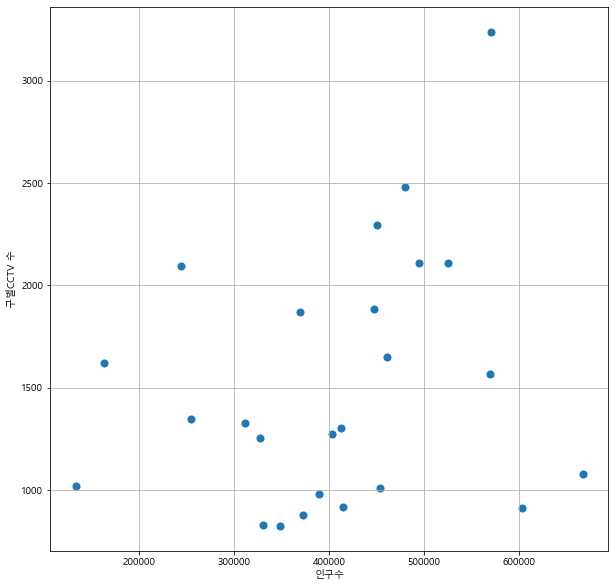

In [12]:
# 산점도
plt.scatter(cctv_res['인구수'], cctv_res['소계'], s=50)
plt.xlabel('인구수')
plt.xlabel('구별CCTV 수')
plt.grid()
plt.show()

In [6]:
np.corrcoef(cctv_res['인구수'], cctv_res['소계'])

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

- 인구수와 cctv 대표하는 직선 그리기

In [8]:
# 기울기와 절편 - np.polyfit(data1, data2,차수)
poly_fit = np.polyfit(cctv_res.인구수, cctv_res.소계, 1)
poly_fit

array([1.15151285e-03, 1.04561312e+03])

In [9]:
# 직선식을 생성 - np.poly1d(계수)
poly_1d = np.poly1d(poly_fit)
poly_1d

poly1d([1.15151285e-03, 1.04561312e+03])

In [10]:
# x좌표(인구수) 생성
xs = np.linspace(cctv_res.인구수.min(), cctv_res.인구수.max())
xs

array([133240.        , 144142.91836735, 155045.83673469, 165948.75510204,
       176851.67346939, 187754.59183673, 198657.51020408, 209560.42857143,
       220463.34693878, 231366.26530612, 242269.18367347, 253172.10204082,
       264075.02040816, 274977.93877551, 285880.85714286, 296783.7755102 ,
       307686.69387755, 318589.6122449 , 329492.53061224, 340395.44897959,
       351298.36734694, 362201.28571429, 373104.20408163, 384007.12244898,
       394910.04081633, 405812.95918367, 416715.87755102, 427618.79591837,
       438521.71428571, 449424.63265306, 460327.55102041, 471230.46938776,
       482133.3877551 , 493036.30612245, 503939.2244898 , 514842.14285714,
       525745.06122449, 536647.97959184, 547550.89795918, 558453.81632653,
       569356.73469388, 580259.65306122, 591162.57142857, 602065.48979592,
       612968.40816327, 623871.32653061, 634774.24489796, 645677.16326531,
       656580.08163265, 667483.        ])

In [11]:
# xs(임의의 인구수)에 대응하는 ys(cctv 대수) 계산
ys = poly_1d(xs)
ys

array([1199.04069124, 1211.59554181, 1224.15039238, 1236.70524294,
       1249.26009351, 1261.81494407, 1274.36979464, 1286.92464521,
       1299.47949577, 1312.03434634, 1324.5891969 , 1337.14404747,
       1349.69889804, 1362.2537486 , 1374.80859917, 1387.36344973,
       1399.9183003 , 1412.47315087, 1425.02800143, 1437.582852  ,
       1450.13770256, 1462.69255313, 1475.2474037 , 1487.80225426,
       1500.35710483, 1512.9119554 , 1525.46680596, 1538.02165653,
       1550.57650709, 1563.13135766, 1575.68620823, 1588.24105879,
       1600.79590936, 1613.35075992, 1625.90561049, 1638.46046106,
       1651.01531162, 1663.57016219, 1676.12501275, 1688.67986332,
       1701.23471389, 1713.78956445, 1726.34441502, 1738.89926558,
       1751.45411615, 1764.00896672, 1776.56381728, 1789.11866785,
       1801.67351841, 1814.22836898])

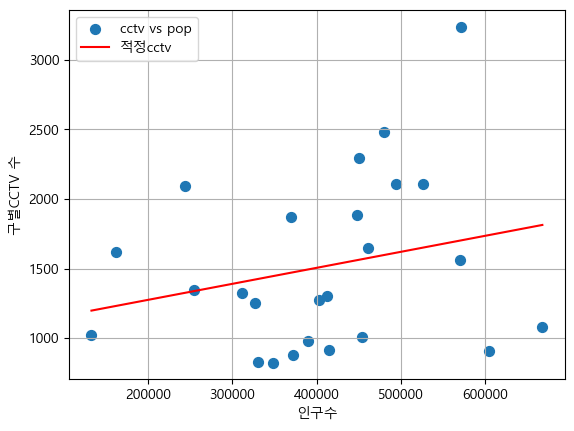

In [14]:
# 직선을 포함한 그래프 생성
# 산점도
plt.scatter(cctv_res['인구수'], cctv_res['소계'], s=50, label='cctv vs pop')
plt.plot(xs, ys, color = 'red', label = '적정cctv')
plt.xlabel('인구수')
plt.ylabel('구별CCTV 수')
plt.legend(loc='upper left')
plt.grid()
plt.show()

- 인구수가 400000 적정 cctv 대수는 1500대라는것을 표현함
- 직선 위에 표현되는 data는 적정 cctv 대수 이상을 보유한 구
- 직선 아래에 표현되는 data는 적정 cctv 대수를 보유하지 못한 구

### cctv 추가 설치가 필요한 구, cctv가 충분한 구 10개 구에 대하여 마킹 

In [15]:
# 각 구별 적절한 cctv 수를 계산
poly_1d(cctv_res['인구수']) # 구별 인구수 대비 적절한 cctv 대수

array([1702.55119857, 1567.51674158, 1425.83344942, 1740.86433401,
       1650.75039317, 1474.16474662, 1561.34578424, 1339.34331951,
       1701.26611024, 1447.08346749, 1471.09251034, 1520.63519906,
       1494.29894874, 1422.34551701, 1564.15086953, 1404.014584  ,
       1576.7599352 , 1814.22836898, 1598.31395267, 1509.65552407,
       1326.81601125, 1614.90725279, 1233.10244125, 1199.04069124,
       1522.91864903])

In [16]:
# 구별 인구수 대비 CCTV 오차 계산
cctv_res['소계'] - poly_1d(cctv_res['인구수'])

구별
강남구     1535.448801
강동구     -557.516742
강북구     -594.833449
강서구     -829.864334
관악구      458.249607
광진구     -596.164747
구로구      322.654216
금천구        8.656680
노원구     -135.266110
도봉구     -622.083467
동대문구     398.907490
동작구     -218.635199
마포구     -514.298949
서대문구    -168.345517
서초구      732.849130
성동구      -77.014584
성북구       74.240065
송파구     -733.228369
양천구      883.686047
영등포구    -232.655524
용산구      769.183989
은평구      493.092747
종로구      385.897559
중구      -176.040691
중랑구     -606.918649
Name: 소계, dtype: float64

- 오차를 절댓값으로 계산 후 상위 10개 확인

In [17]:
cctv_res['오차'] = np.abs(cctv_res['소계'] - poly_1d(cctv_res['인구수']))
cctv_res.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,557.516742
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,594.833449
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,458.249607


In [19]:
#data_result의 오차열을 기준으로 내림차순 정렬한 후
#상위 10개  구만 추출
df_sort = cctv_res.sort_values(by='오차', ascending=False)
df_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,883.686047
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,769.183989
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.161952,733.228369
서초구,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.510093,732.849130
도봉구,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630,622.083467
중랑구,916,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,0.220988,606.918649
광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,596.164747


- 오차가 큰 상위 10개 도시 표시하기
- 그래프에 글자 출력하는 함수
- plt.text(x좌표,y좌표,text,fontsize)
- 점 보다 약간 오른쪽 아래에 출력되도록 좌표를 변경후 출력
- (for n in range(10) :
-    plt.text(data_sort['인구수'][n]*1.02,data_sort['소계'][n]*0.98,df_sort.index[n],fontsize=15))

In [22]:
df_sort['인구수'][0] * 1.02
df_sort['소계'][0] * 0.98
df_sort.index[0]

'강남구'

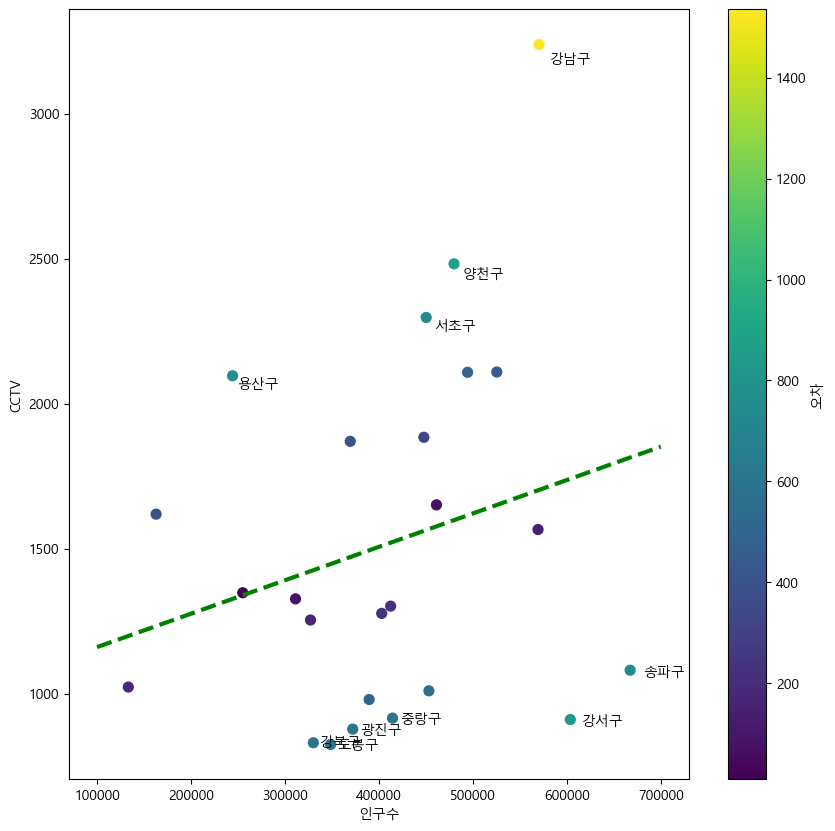

In [23]:
#인구수 대비 cctv 대수의 분산 그래프 마커 크기 = 50
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'], cctv_res['소계'], s=50, c=cctv_res['오차'])
plt.plot(fx, poly_1d(fx), ls='dashed', lw=3, color='g')

# 오차가 큰 10개 구를 그래프에 표시
for n in range(10) :
    plt.text(df_sort['인구수'][n] * 1.02,
        df_sort['소계'][n] * 0.98, df_sort.index[n], fontsize=10)

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar(label='오차')
plt.show()